In [1]:
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

from Lineaire.Linear import *
from Loss.MSELoss import *

from icecream import ic
from utils import tools

# Chargement du dataset 

In [2]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# Données de forme (442 exemples, 10 dimensions)
# On récupère une seule dimensions (la N°3), newaxis est fait pour qu'on ait pas un vecteur mais une matrice 442*1
diabetes_X = diabetes_X[:, np.newaxis, 2]

# scaler = StandardScaler()
# diabetes_y = np.reshape(diabetes_y, (-1,1))
# dataset_diabetes = scaler.fit_transform(np.hstack((diabetes_X, diabetes_y)))

# diabetes_X=dataset_diabetes[:-1]
# diabetes_y=dataset_diabetes[-1]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = np.reshape(diabetes_y[:-20], (-1,1))
diabetes_y_test = np.reshape(diabetes_y[-20:], (-1,1))

dim_input = diabetes_X_train.shape[1] #==1, pour faire de la régression 2D
dim_output = 1  #len(diabetes_y_train.shape) == 1

## Standardisation des données

In [3]:
scaler = StandardScaler()
diabetes_X_train = scaler.fit_transform(diabetes_X_train)
scaler = StandardScaler()
diabetes_y_train = scaler.fit_transform(diabetes_y_train)
scaler = StandardScaler()
diabetes_X_test = scaler.fit_transform(diabetes_X_test)
scaler = StandardScaler()
diabetes_y_test = scaler.fit_transform(diabetes_y_test)

# Execution pas à pas

## Affichage des données et passe forward

     name  input_dim  output_dim
0  Linear          1           1
     name              parametres gradient
0  Linear  [[1.7090239867264445]]  [[0.0]]


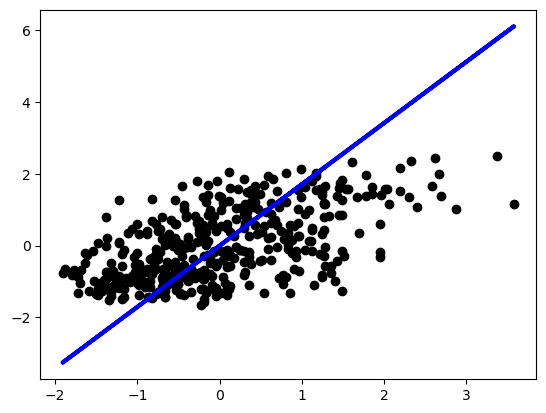

In [4]:
diabetes_y_train = np.reshape(diabetes_y_train, (-1,1))
plt.scatter(diabetes_X_train, diabetes_y_train, color="black")

couche_lineaire = Linear(dim_input, dim_output)
couche_lineaire.describe_shape()
couche_lineaire.describe_values()
output = couche_lineaire.forward(diabetes_X_train)
plt.plot(diabetes_X_train, output, color="blue", linewidth=3)

plt.xticks()
plt.yticks()
plt.show()

## Passe backward

### Cout

In [5]:
mseloss = MSELoss()
cout = mseloss.forward(diabetes_y_train, output)
print(f"{cout.mean()=}")

gradient_loss = mseloss.backward(diabetes_y_train, output) # le premier delta du backward
print(f"gradient loss p.r aux sorties: {gradient_loss}")

cout.mean()=1.9420371821873283
gradient loss p.r aux sorties: [[ 4.45864433e+00]
 [-1.69906500e+00]
 [ 3.47933063e+00]
 [-2.23173676e+00]
 [-2.17114260e+00]
 [-1.49541129e+00]
 [-3.02307781e+00]
 [ 2.17316074e+00]
 [ 5.52182600e+00]
 [-1.29012305e+00]
 [-4.69570208e+00]
 [ 3.41102777e+00]
 [-2.77021903e+00]
 [-9.90452999e-01]
 [-9.56169734e-01]
 [-1.78862751e+00]
 [ 2.67622084e+00]
 [ 1.07911254e+00]
 [ 6.72184742e-01]
 [-1.71083373e+00]
 [-1.90461690e+00]
 [ 1.06532965e+00]
 [ 1.88867615e+00]
 [ 1.94369174e+00]
 [ 1.74497330e+00]
 [-2.20542586e+00]
 [-5.16474258e+00]
 [ 6.01527921e+00]
 [-9.83619541e-01]
 [-3.84137307e+00]
 [ 3.79050575e+00]
 [-2.29054871e+00]
 [ 4.09913939e+00]
 [-1.93282598e+00]
 [-2.29130798e+00]
 [-9.28340291e-01]
 [-1.28442850e+00]
 [-2.42122794e+00]
 [ 2.53631435e+00]
 [ 2.63422887e+00]
 [ 7.49219250e-01]
 [-2.34165196e+00]
 [ 1.60571011e+00]
 [-1.27128683e-01]
 [ 2.12255310e+00]
 [ 3.26348798e-02]
 [-1.81683659e+00]
 [-4.98474231e+00]
 [-1.00233771e+00]
 [ 1.28

### Mise à jour des paramètres

In [6]:
couche_lineaire.zero_grad()
couche_lineaire.backward_update_gradient(diabetes_X_train, delta=gradient_loss)
print(f'gradient: {couche_lineaire._gradient}')
#couche_lineaire.backward_delta(diabetes_X_train , delta=gradient_loss)
couche_lineaire.update_parameters(gradient_step=1e-3)
print(f'parametres: {couche_lineaire._parameters}')

gradient: [[953.82024135]]
parametres: [[0.75520375]]


## Re-Passe forward

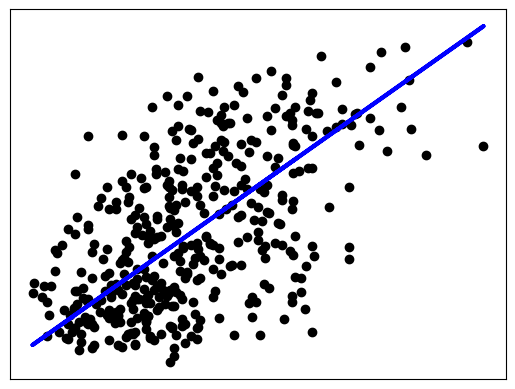

In [7]:
output2 = couche_lineaire.forward(diabetes_X_train)
plt.scatter(diabetes_X_train, diabetes_y_train, color="black")
plt.plot(diabetes_X_train, output2, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [8]:
mseloss = MSELoss()
cout = mseloss.forward(diabetes_y_train, output)
print(f"{cout.mean()=}")


cout.mean()=1.9420371821873283


# Boucle d'apprentissage

In [9]:
couts = []
def train(couche_lineaire, nb_iter, eps, print_every=None):
    for i in range(nb_iter):
        output = couche_lineaire.forward(diabetes_X_train)
        
        mseloss = MSELoss()
        cout = mseloss.forward(diabetes_y_train, output)
        couts.append(cout.mean())
        if (print_every is not None) and (i % print_every == 0):
            print(cout)
            couche_lineaire.describe_values()
            print('###################')
        
        gradient_loss = mseloss.backward(diabetes_y_train, output) # le premier delta du backward
        couche_lineaire.zero_grad()
        couche_lineaire.backward_update_gradient(diabetes_X_train, delta=gradient_loss)
        couche_lineaire.update_parameters(gradient_step=eps)
    return couche_lineaire

- 1e-1 a donné une erreur
- avant j'avais pas scalé les y ce qui fait que apres quelques itérations l'apprentissage stagnait (la barre restait un peu en dessous du nuage de points)

In [10]:
couche_lineaire.reset()
couts=[]
couche_lineaire = train(couche_lineaire, nb_iter=1000, eps=1e-3, print_every=100)

[9.02772490e+00 1.28980045e+01 4.08044479e+00 7.08794622e-03
 4.26571293e+00 7.68282897e+00 6.55773261e+00 1.66148453e+00
 6.11585973e+00 1.55553784e+01 2.35934004e+01 6.21871231e-02
 1.25626425e+00 8.57441471e-02 3.06751503e+00 4.76394420e-01
 5.00543568e+00 2.07823800e-01 1.62723029e+00 5.31601691e-01
 1.55970529e+01 6.17899110e+00 1.77163138e+00 1.73885007e+01
 4.62275044e+00 4.45503179e-04 1.65643704e+01 4.16983320e+00
 1.87454877e+00 1.82173137e+00 3.47607508e+00 2.01913269e+01
 7.43167210e+01 1.14403406e+01 1.85658740e+01 4.95531729e+00
 6.54879765e+00 4.46859756e+00 2.29925544e+01 1.88783015e-02
 1.27659208e+00 2.16430327e+01 3.03593006e+00 3.92701570e+00
 2.23304591e+01 9.45628638e+00 1.51930621e-02 1.43744813e+01
 9.67502288e+00 2.88169734e-01 1.32001221e-01 2.95781682e+00
 2.94084409e+00 2.10842537e+00 2.52741096e+00 7.82506665e+00
 4.98106929e-01 2.18261934e+01 9.00514116e+00 1.16040189e+00
 2.02147500e+00 6.69719416e-03 2.88585220e+00 4.88212896e+00
 5.57345640e+00 1.242209

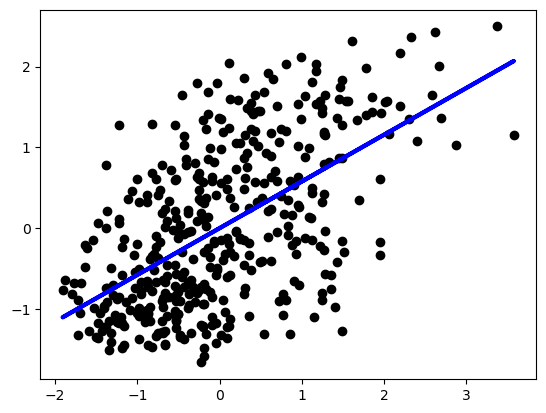

In [11]:
output2 = couche_lineaire.forward(diabetes_X_train)
plt.scatter(diabetes_X_train, diabetes_y_train, color="black")
plt.plot(diabetes_X_train, output2, color="blue", linewidth=3)

plt.xticks()
plt.yticks()
plt.show()


# Dataset de tets

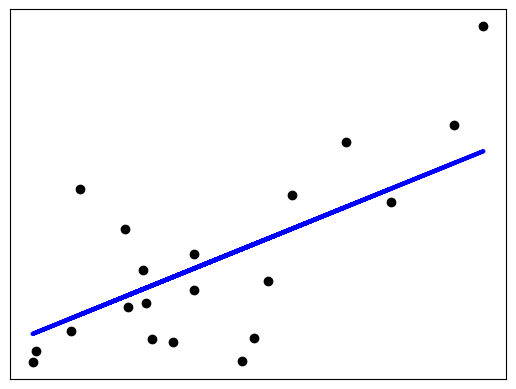

cout: [0.18481126 0.01769376 0.2337389  0.57483052 0.04679278 1.09957628
 1.96538235 0.02935315 1.98205484 0.36159102 0.02195802 0.02201711
 1.57066357 0.52584002 0.10058548 0.13826821 0.05988422 0.02500422
 0.53537122 0.04050013]
Coefficient of determination: 0.52


In [12]:
output_test = couche_lineaire.forward(diabetes_X_test)
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, output_test, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()
print(f'cout: {mseloss.forward(diabetes_y_test, output_test)}')
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, output_test))


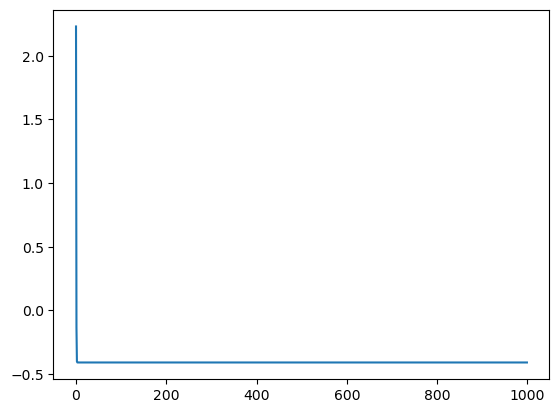

In [13]:
plt.plot( np.arange(len(couts)) , np.log(couts))

## Classification binaire

C:\Users\mouni\AppData\Local\Temp\ipykernel_1972\522194279.py:66: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


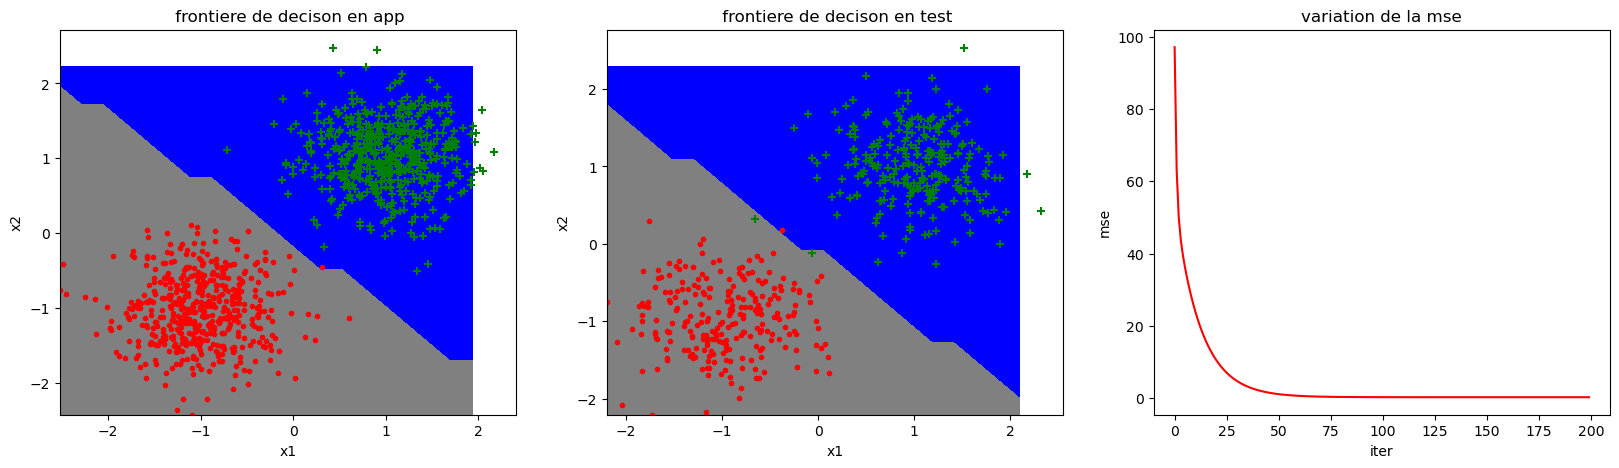

In [14]:
# on a besoin d'un seul nourronne donc d=2, d'=1 (simple aussi) 

batch=1000

x_class, y_class = tools.gen_arti(sigma=0.2, nbex=batch, data_type=0, epsilon=0.1)
x_class_t, y_class_t = tools.gen_arti(sigma=0.2, nbex=500, data_type=0, epsilon=0.1)

y_class = np.where(y_class==-1,0,1).reshape((-1,1))
y_class_t = np.where(y_class_t==-1,0,1).reshape((-1,1))

loss_mse = MSELoss()
module_lin = Linear(x_class.shape[1], 1)
#module_sig= Sigmoide()

iter=200
hist_loss=[]

for _ in range(iter):

    #forward avoir z_h
    y_hat = module_lin.forward(x_class)
    # y_hat = module_sig.forward(new_feautre_lin_1)

    
    hist_loss.append(loss_mse.forward(y_class,y_hat).mean())

    #backward calculer dervie de l par rapport z_h
    loss_back = loss_mse.backward(y_class, y_hat)
    #delta_sig = module_sig.backward_delta(new_feautre_lin_1,loss_back)
    
    delta_lin1 = module_lin.backward_delta(x_class,loss_back)
    module_lin.backward_update_gradient(x_class, loss_back)
    module_lin.update_parameters(gradient_step=1e-4)
    
    module_lin.zero_grad()


y_hat = module_lin.forward(x_class)
# y_hat = module_sig.forward(new_feautre_lin_1)

fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(20,5))
ax.flatten()


def sign(x):
    return np.where(module_lin.forward(x)>0,1,0)


tools.plot_frontiere(x_class,sign,ax=ax[0])
tools.plot_data(x_class, y_class,ax[0])
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x2")
ax[0].set_title(" frontiere de decison en app")

tools.plot_frontiere(x_class_t,sign,ax=ax[1])
tools.plot_data(x_class_t, y_class_t,ax[1])
ax[1].set_xlabel("x1")
ax[1].set_ylabel("x2")
ax[1].set_title(" frontiere de decison en test")


ax[2].plot(np.arange(iter),hist_loss,color='red',label="la function de cout")
ax[2].set_xlabel("iter")
ax[2].set_ylabel("mse")
ax[2].set_title("variation de la mse")
fig.show()
